In [86]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 3)

# default using seabron style
%matplotlib inline
plt.style.use('seaborn')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset
Illustrate line plots using stock data using pandas_datareader. Note yahoo finance API is not accurate or reliable, we use it for demonstration ONLY

In [87]:
iris = sns.load_dataset('iris')
iris.shape
iris.head()
x_col, y_col = 'sepal_length', 'sepal_width'

tips = sns.load_dataset("tips")
tips.head()

(150, 5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution plots
- boxplot
- swarmplot
- violin plot

### Boxplot
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
- matplotlib, more complex to use
- seaborn, support hue
- pandas, df.plot.box does not seem to support 'by'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:2251: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


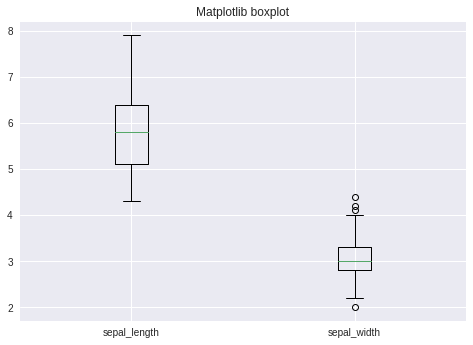

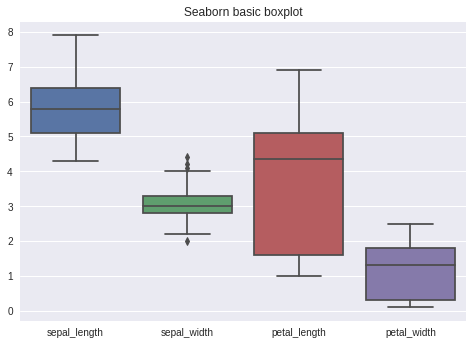

<Figure size 576x396 with 0 Axes>

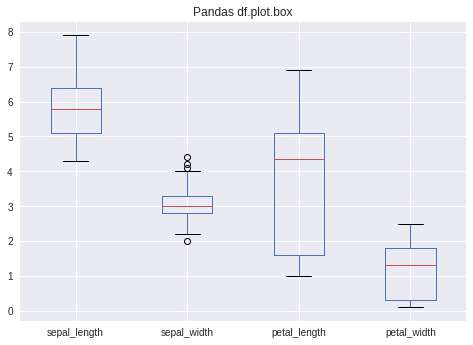

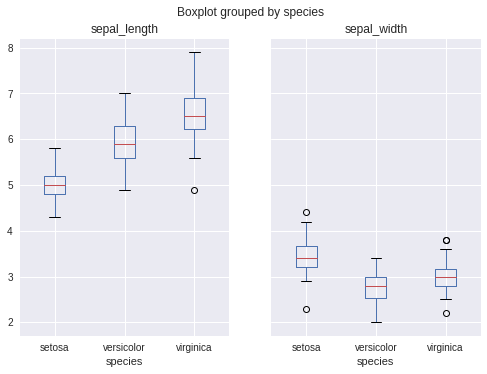

In [88]:
# matplot boxplot, need to specify list of numerical row vectors
plt.figure()
plt.boxplot(iris[[x_col, y_col]].T, labels=[x_col, y_col]);
plt.title(f"Matplotlib boxplot");

# seaborn boxplot
plt.figure()
sns.boxplot(data=iris)
plt.title(f"Seaborn basic boxplot");

# pandas box plot, only plot numerical features
plt.figure()
iris.plot.box();
plt.title('Pandas df.plot.box');

fig, ax = plt.subplots(1, 1);
iris.boxplot(column=[x_col, y_col], by='species', layout=(1,2), ax=ax);
ax.set_title('Pandas df.boxplot');

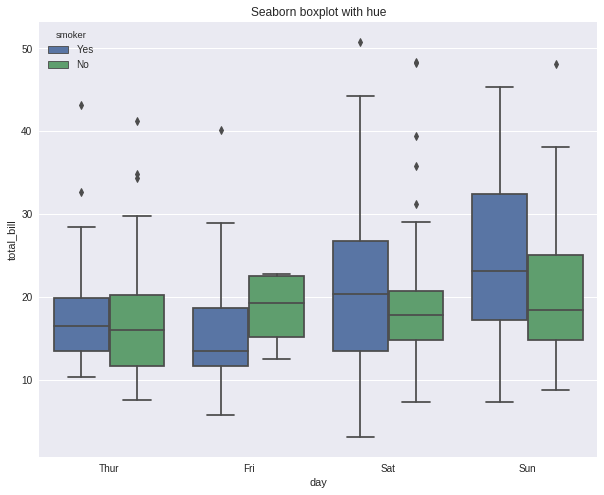

In [89]:
# seaborn, use x/y/hue x, hue categorical, y numerical
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, ax=ax)
ax.set_title('Seaborn boxplot with hue');

### Violin plot
A combination of boxplot and kernel density estimate.
- matplotlib, more complex to use
- seaborn, support hue

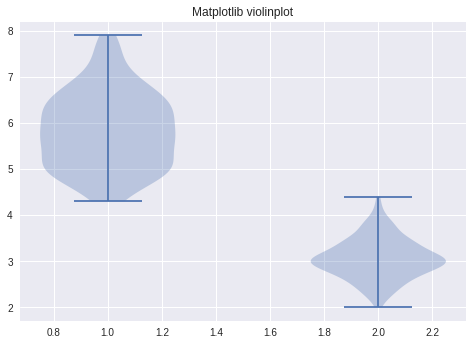

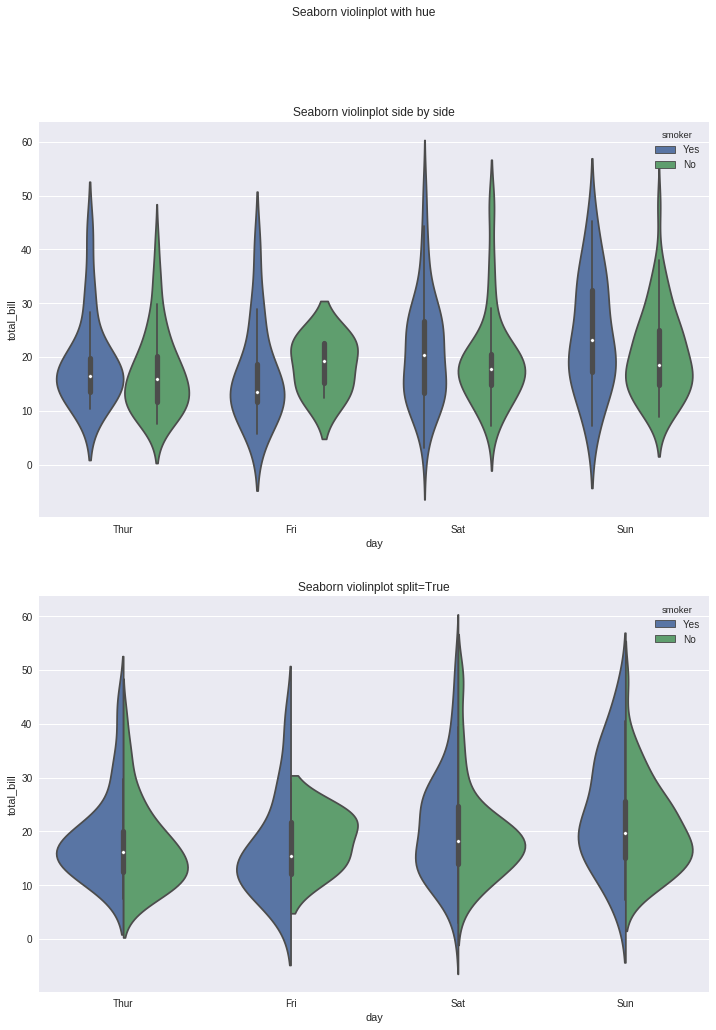

In [90]:
# matplot boxplot, need to specify list of numerical row vectors
plt.figure();
plt.violinplot(iris[[x_col, y_col]].T);
plt.title(f"Matplotlib violinplot");

# seaborn boxplot
fig, axes = plt.subplots(2, 1, figsize=(12, 16));
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, ax=axes[0]);
axes[0].set_title(f"Seaborn violinplot side by side");
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, split=True, ax=axes[1]);
axes[1].set_title(f"Seaborn violinplot split=True");
plt.suptitle(f"Seaborn violinplot with hue");

### Swarm plot (seaborn only)
Draw a categorical scatterplot with non-overlapping points.
- seaborn, support hue

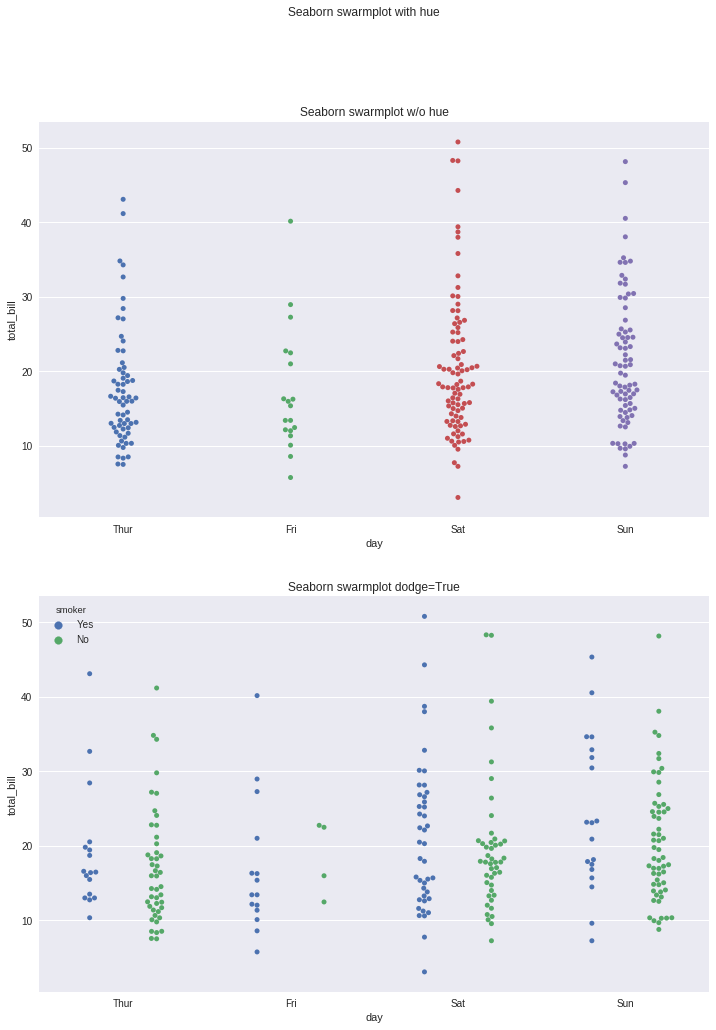

In [93]:
# seaborn boxplot, when use hue , better choose dodge=True
fig, axes = plt.subplots(2, 1, figsize=(12, 16));
sns.swarmplot(x="day", y="total_bill", data=tips, ax=axes[0]);
axes[0].set_title(f"Seaborn swarmplot w/o hue");
sns.swarmplot(x="day", y="total_bill", hue="smoker", data=tips, dodge=True, ax=axes[1]);
axes[1].set_title(f"Seaborn swarmplot dodge=True");
plt.suptitle(f"Seaborn swarmplot with hue");